In [1]:
from IPython.display import Audio
import numpy as np
import torch
from converter import MelToWave

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [3]:
converter = MelToWave('waveglow_256channels_ljs_v2.pt')
converter.wave_glow.to(device='cuda')

/media/black_chick/Notes/HSE/DLA_course/HW/hw_env/lib/python3.9/site-packages/torch/serialization.py:1101: SourceChangeWarning: source code of class 'glow.WaveGlow' has changed. Saved a reverse patch to WaveGlow.patch. Run `patch -p0 < WaveGlow.patch` to revert your changes.
  warnings.warn(msg, SourceChangeWarning)
/media/black_chick/Notes/HSE/DLA_course/HW/hw_env/lib/python3.9/site-packages/torch/serialization.py:1101: SourceChangeWarning: source code of class 'torch.nn.modules.conv.ConvTranspose1d' has changed. Tried to save a patch, but couldn't create a writable file ConvTranspose1d.patch. Make sure it doesn't exist and your working directory is writable.
  warnings.warn(msg, SourceChangeWarning)
/media/black_chick/Notes/HSE/DLA_course/HW/hw_env/lib/python3.9/site-packages/torch/serialization.py:1101: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. Saved a reverse patch to ModuleList.patch. Run `patch -p0 < ModuleList.patch` to revert

WaveGlow(
  (upsample): ConvTranspose1d(80, 80, kernel_size=(1024,), stride=(256,))
  (WN): ModuleList(
    (0-3): 4 x WN(
      (in_layers): ModuleList(
        (0): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(2,), dilation=(2,))
        (2): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(4,), dilation=(4,))
        (3): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(8,), dilation=(8,))
        (4): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(16,), dilation=(16,))
        (5): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(32,), dilation=(32,))
        (6): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(64,), dilation=(64,))
        (7): Conv1d(256, 512, kernel_size=(3,), stride=(1,), padding=(128,), dilation=(128,))
      )
      (res_skip_layers): ModuleList(
        (0-6): 7 x Conv1d(256, 512, kernel_size=(1,), stride=(1,))
        (7): Conv1d

/tmp/ipykernel_11368/520387671.py:2: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(mel.squeeze()))


(342, 80)

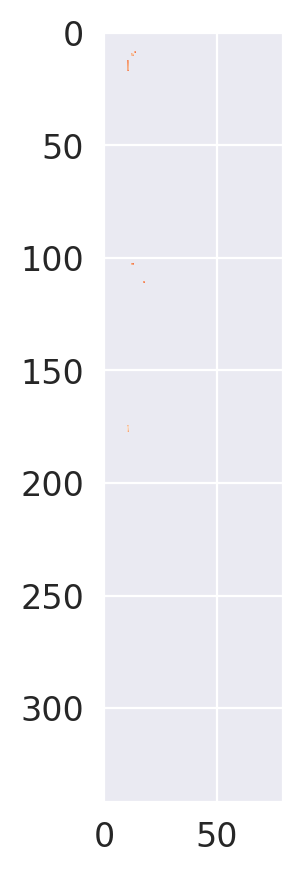

In [7]:
mel = np.load('test_mel.npy')
plt.imshow(np.log(mel.squeeze()))
mel.shape

In [9]:
mel_tensor = torch.from_numpy(mel.T).unsqueeze(0)
output = converter.mel_to_wave(mel_tensor.to(device='cuda'))
display(Audio(output, rate=22050))

In [10]:
mel.shape

(342, 80)